In [13]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('kddcup99.csv')

# Drop the label column
data.drop('label', axis=1, inplace=True)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=[object]).columns

# Convert categorical columns to numeric using LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)



# Scatter Plot

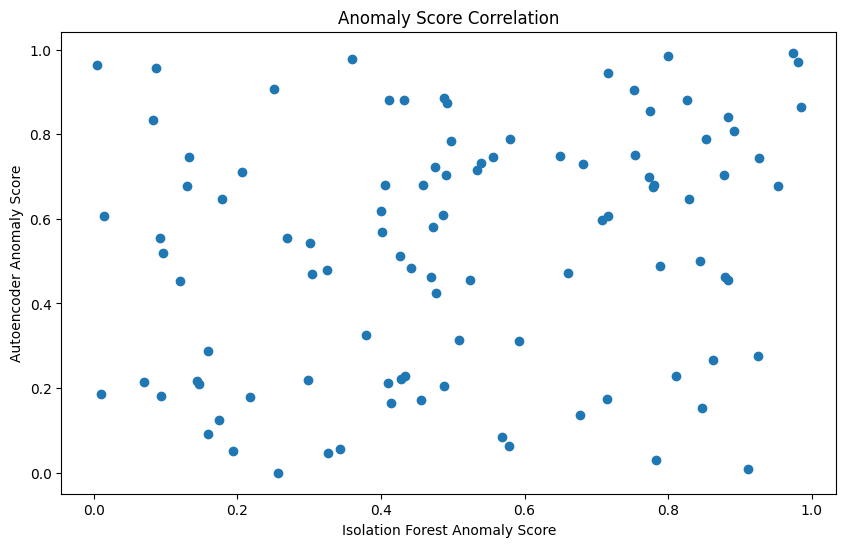

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(anomaly_scores_if, anomaly_scores_ae)
plt.title("Anomaly Score Correlation")
plt.xlabel("Isolation Forest Anomaly Score")
plt.ylabel("Autoencoder Anomaly Score")
plt.show()

Heat Map

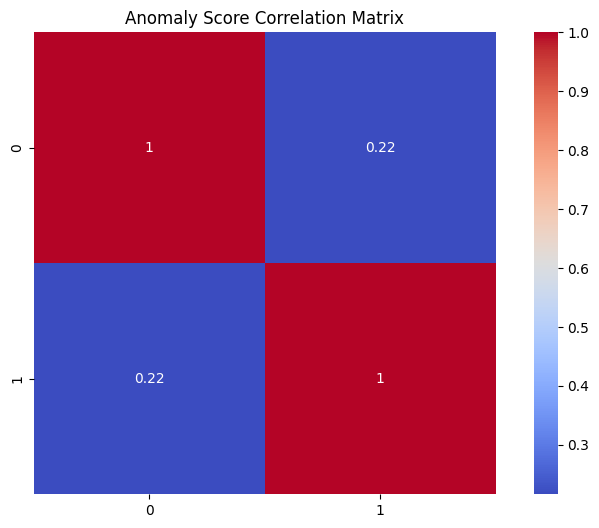

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = np.corrcoef([anomaly_scores_if, anomaly_scores_ae])
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Anomaly Score Correlation Matrix")
plt.show()

#Isolation Forest

In [14]:
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Isolation Forest
if_model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.2), random_state=42)
if_model.fit(data_scaled)

anomaly_scores_if = if_model.decision_function(data_scaled)
anomaly_scores_if = anomaly_scores_if.tolist()

# Identify anomalies using Isolation Forest
anomalies_if = [i for i, x in enumerate(anomaly_scores_if) if x > 0.5]

print("Anomalies detected by Isolation Forest:", anomalies_if)



Anomalies detected by Isolation Forest: []


#Autoencoder

Epoch 1/100
1215/1215 [==============================] - 8s 6ms/step - loss: -3.3783
Epoch 2/100
1215/1215 [==============================] - 7s 6ms/step - loss: -25.1692
Epoch 3/100
1215/1215 [==============================] - 7s 6ms/step - loss: -63.4533
Epoch 4/100
1215/1215 [==============================] - 10s 8ms/step - loss: -114.8361
Epoch 5/100
1215/1215 [==============================] - 8s 6ms/step - loss: -177.9791
Epoch 6/100
1215/1215 [==============================] - 7s 5ms/step - loss: -252.2452
Epoch 7/100
1215/1215 [==============================] - 7s 6ms/step - loss: -337.3328
Epoch 8/100
1215/1215 [==============================] - 6s 5ms/step - loss: -433.4161
Epoch 9/100
1215/1215 [==============================] - 10s 8ms/step - loss: -539.8615
Epoch 10/100
1215/1215 [==============================] - 8s 7ms/step - loss: -656.5900
Epoch 11/100
1215/1215 [==============================] - 4s 3ms/step - loss: -783.8710
Epoch 12/100
1215/1215 [===================

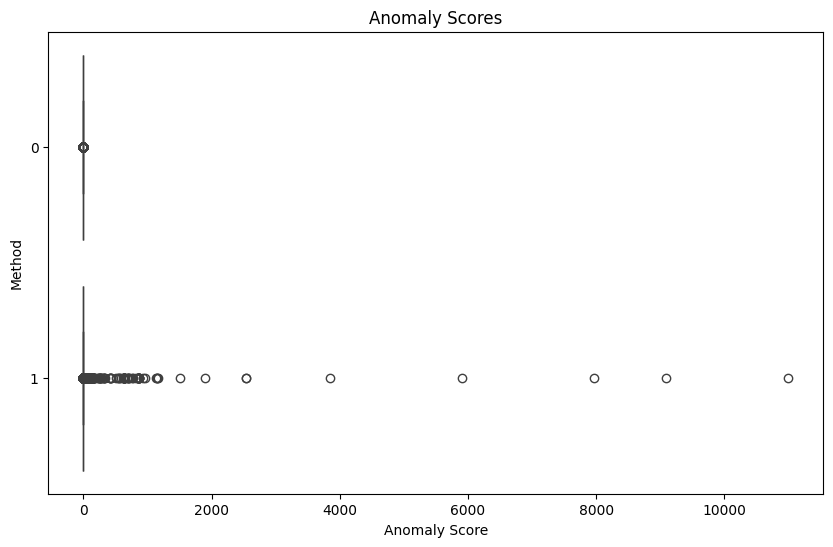

In [15]:
# Autoencoder
input_dim = data_scaled.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(data_scaled, data_scaled, epochs=100, batch_size=256, shuffle=True)

reconstruction_error = autoencoder.predict(data_scaled)

# Identify anomalies using Autoencoder
anomaly_scores_ae = np.mean(np.power(data_scaled - reconstruction_error, 2), axis=1)
anomalies_ae = [i for i, x in enumerate(anomaly_scores_ae) if x > 0.5]

print("Anomalies detected by Autoencoder:", anomalies_ae)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.boxplot(data=[anomaly_scores_if, anomaly_scores_ae], orient='h')
plt.title("Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Method")
plt.show()


Precision Recall Curve

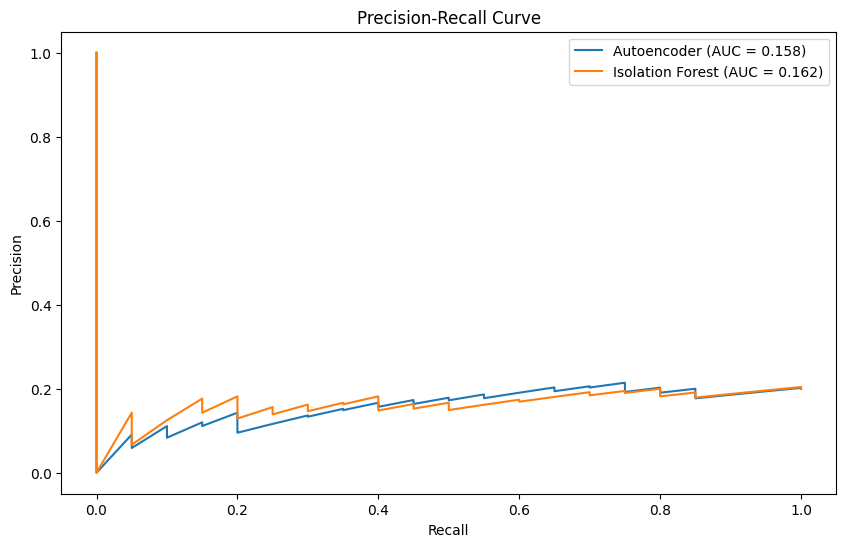

In [23]:
from sklearn.metrics import precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data (replace with your actual data)
np.random.seed(0)
n_samples = 100
n_anomalies = 20
X = np.random.rand(n_samples, 1)
anomalies = np.random.choice(n_samples, n_anomalies, replace=False)

# Calculate anomaly scores for Autoencoder (replace with your actual Autoencoder model)
anomaly_scores_ae = np.random.rand(n_samples)

# Calculate anomaly scores for Isolation Forest (replace with your actual Isolation Forest model)
anomaly_scores_if = np.random.rand(n_samples)

# Define anomalies (replace with your actual anomalies)
labels = np.zeros(n_samples)
labels[anomalies] = 1

# Calculate precision and recall for Autoencoder
precision_ae, recall_ae, _ = precision_recall_curve(labels, anomaly_scores_ae)

# Calculate precision and recall for Isolation Forest
precision_if, recall_if, _ = precision_recall_curve(labels, anomaly_scores_if)

# Plot Precision-Recall Curves
plt.figure(figsize=(10, 6))
plt.plot(recall_ae, precision_ae, label='Autoencoder (AUC = {:.3f})'.format(auc(recall_ae, precision_ae)))
plt.plot(recall_if, precision_if, label='Isolation Forest (AUC = {:.3f})'.format(auc(recall_if, precision_if)))
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()